# @Majeed Shaikh
(Desk Research)

# $$ Novel   COVID-19 : The   Pandemic   Analysis $$

.

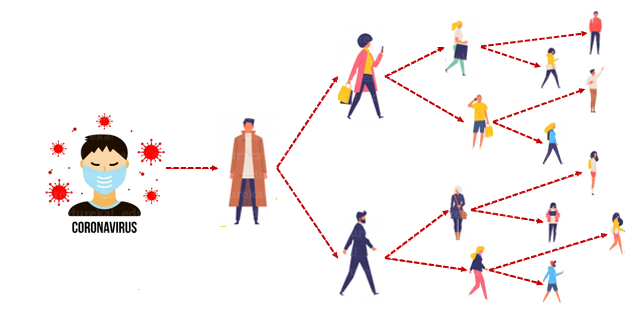

# What is COVID-19?

COVID-19 is an infectious disease caused by the Coronavirus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China’s Hubei province in December 2019 and has spread all over the world since then.
    
   Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
   
   The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so you might have heard caution to practice respiratory etiquette (for example, by coughing into a flexed elbow).

 **Corona Virus Explained in Simple Terms:**

- Let's say Rahul got infected yesterday, but he won't know it untill next 14 days
- Rahul thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

.

# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

.

# Step 2: Importing Dataset

(I have downloaded datasets from Kaggle)

https://www.kaggle.com/sudalairajkumar/covid19-in-india

In [2]:
Covid19_data = pd.read_csv('E://Desktop//COVID-19//INDIA_COVID-19_DATA.csv')
Individuals_data = pd.read_csv('E://Desktop//COVID-19//IndividualDetails.csv')
Excel_file = pd.ExcelFile('E://Desktop//COVID-19//Indian States Population and Area.xlsx')
indian_states_data = Excel_file.parse('Sheet1')


In [3]:
Covid19_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/20,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/20,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [4]:
Covid19_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7081,7082,10/7/2020,8:00 AM,Telengana,-,-,177008,1189,204748
7082,7083,10/7/2020,8:00 AM,Tripura,-,-,22623,301,27545
7083,7084,10/7/2020,8:00 AM,Uttarakhand,-,-,43238,677,52329
7084,7085,10/7/2020,8:00 AM,Uttar Pradesh,-,-,370753,6153,420937
7085,7086,10/7/2020,8:00 AM,West Bengal,-,-,243743,5318,277049


In [5]:
Covid19_data.shape

(7086, 9)

So we can see that the dataset provides a day by day record of the number of cases found in a specific state in the country. On further inspecting, we find that this dataset contains 7086 entries and contains 9 features. These are as seen contains some vital data like the number of confirmed cases, deaths, cured people till a specific day in a specific state. The Confirmed Cases are further broken down into Indian Nationals and Foreigners.

.

# Step 3: Checking Null Values

In [6]:
Covid19_data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

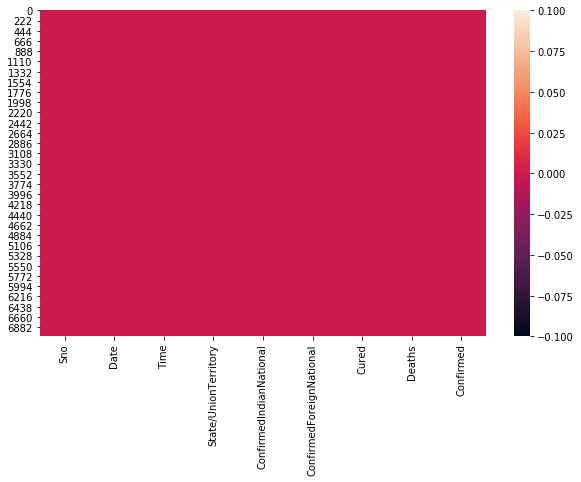

In [7]:
sns.heatmap(Covid19_data.isnull())
plt.show()

# Great!!!
We have Cleaned Data.

.

In [8]:

Covid19_data["Date"] = pd.to_datetime(Covid19_data["Date"])

In [9]:
Covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       7086 non-null   int64         
 1   Date                      7086 non-null   datetime64[ns]
 2   Time                      7086 non-null   object        
 3   State/UnionTerritory      7086 non-null   object        
 4   ConfirmedIndianNational   7086 non-null   object        
 5   ConfirmedForeignNational  7086 non-null   object        
 6   Cured                     7086 non-null   int64         
 7   Deaths                    7086 non-null   int64         
 8   Confirmed                 7086 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 498.4+ KB


In [10]:
Covid19_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7081,7082,2020-10-07,8:00 AM,Telengana,-,-,177008,1189,204748
7082,7083,2020-10-07,8:00 AM,Tripura,-,-,22623,301,27545
7083,7084,2020-10-07,8:00 AM,Uttarakhand,-,-,43238,677,52329
7084,7085,2020-10-07,8:00 AM,Uttar Pradesh,-,-,370753,6153,420937
7085,7086,2020-10-07,8:00 AM,West Bengal,-,-,243743,5318,277049


**Grouping different types of cases as per the date**

In [11]:
datewise_cases = Covid19_data.groupby(['Date']).agg({"Confirmed":"sum","Deaths": "sum" ,"Cured":"sum"})

# _The Basic Information from Covid19_dataset (Till 07th October 2020)_

In [12]:
print("Total Number of Confirmed Cases around the India is",datewise_cases["Confirmed"].iloc[-1])
print("Total Number of Recovered Cases around the India is",datewise_cases["Cured"].iloc[-1])
print("Total Number of Death Cases around the India is",datewise_cases["Deaths"].iloc[-1])
print("Total Number of Active Cases around the India is",(datewise_cases["Confirmed"].iloc[-1] - datewise_cases["Cured"].iloc[-1] - datewise_cases["Deaths"].iloc[-1]))
print("Total Number of Closed Cases around the India is",(datewise_cases["Cured"].iloc[-1] + datewise_cases["Deaths"].iloc[-1]))


Total Number of Confirmed Cases around the India is 6757131
Total Number of Recovered Cases around the India is 5744693
Total Number of Death Cases around the India is 104555
Total Number of Active Cases around the India is 907883
Total Number of Closed Cases around the India is 5849248


.

# Step 4  :Analysing COVID-19 Cases in India 

**a) Distributions Plot for Active Cases**

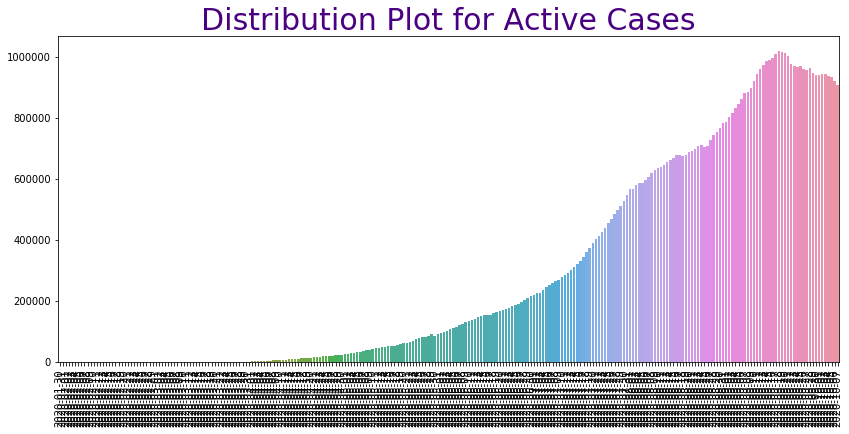

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(x = datewise_cases.index.date, y =datewise_cases["Confirmed"]- datewise_cases["Cured"] - datewise_cases["Deaths"])
plt.title("Distribution Plot for Active Cases",color = "#4B0082",fontsize =30 )
plt.xticks(rotation= 90)
plt.show()

- As we seen that the Active Cases Curve is Exponentially increases from 22nd January to 25th September. After that It decreases.

**b) Distributions Plot for Closed Cases**

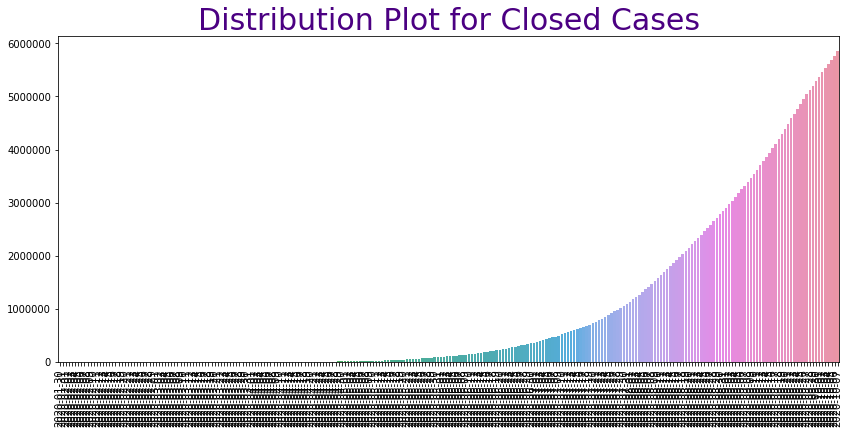

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(x = datewise_cases.index.date, y = datewise_cases["Cured"] + datewise_cases["Deaths"])
plt.title("Distribution Plot for Closed Cases",color = "#4B0082",fontsize =30 )
plt.xticks(rotation= 90)
plt.show()

**c) Weekly Progress of different types of Cases**

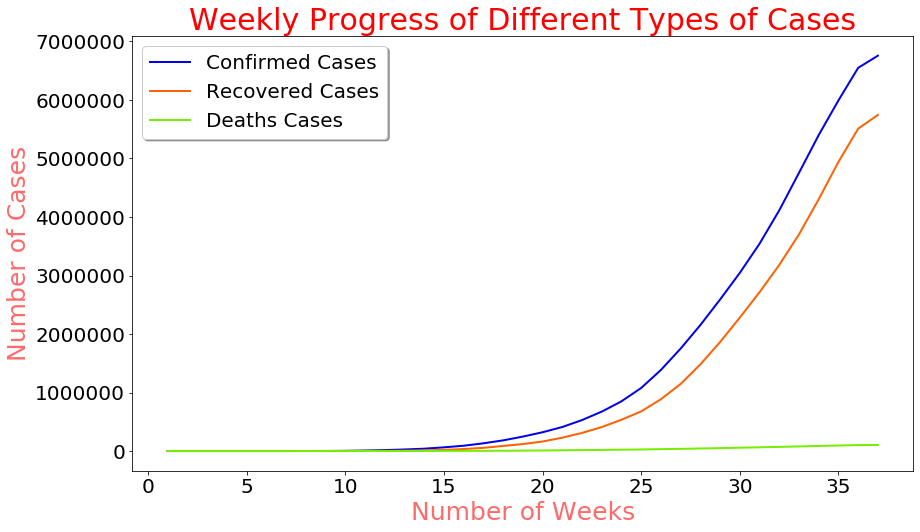

In [15]:
plt.figure(figsize=(14,8))
datewise_cases["WeekofYear"] = datewise_cases.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise_cases["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise_cases[datewise_cases["WeekofYear"] == i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise_cases[datewise_cases["WeekofYear"] == i]["Cured"].iloc[-1])
    weekwise_deaths.append(datewise_cases[datewise_cases["WeekofYear"] == i]["Deaths"].iloc[-1])
    week_num.append(w)
    w += 1
plt.plot(week_num,weekwise_confirmed,linewidth =2,color = "#0000EE",label=  "Confirmed Cases")
plt.plot(week_num,weekwise_recovered,linewidth =2,color = "#FF6103",label=  "Recovered Cases")
plt.plot(week_num,weekwise_deaths,linewidth =2,color = "#76EE00",label=  "Deaths Cases")
plt.xlabel("Number of Weeks",fontsize = 25,color = '#FF6A6A')
plt.ylabel("Number of Cases",fontsize = 25,color = '#FF6A6A')
plt.title("Weekly Progress of Different Types of Cases",fontsize = 30,color = 'Red')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20},frameon= True,fancybox = True,\
          shadow = True,framealpha = 1)
plt.show()

    

**d) Number of Confirmed and Deaths Cases**

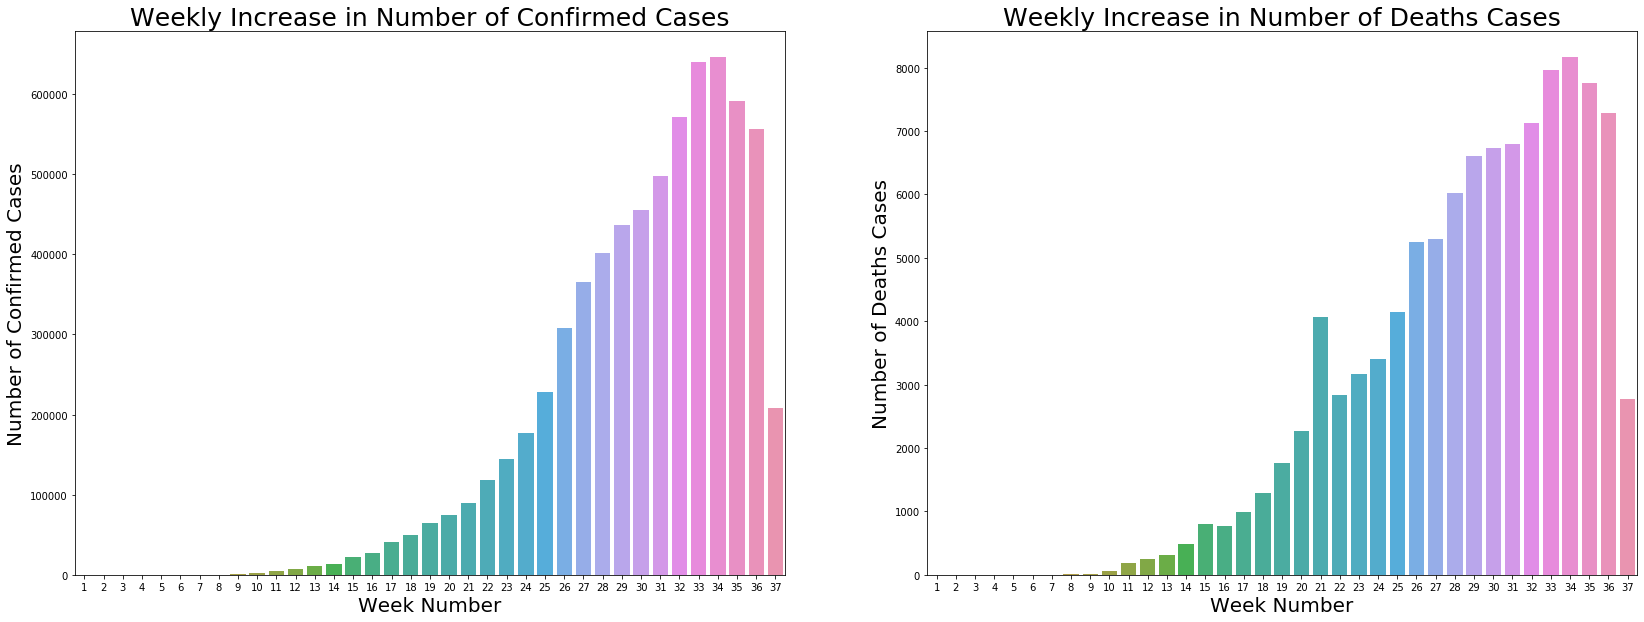

In [16]:
fig, (ax1, ax2)  =plt.subplots(1,2,figsize=(28,10))
sns.barplot(x= week_num,y= pd.Series(weekwise_confirmed).diff().fillna(0), ax = ax1)
sns.barplot(x= week_num,y= pd.Series(weekwise_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Week Number",fontsize = 20)
ax2.set_xlabel("Week Number",fontsize = 20)
ax1.set_ylabel("Number of Confirmed Cases",fontsize = 20)
ax2.set_ylabel("Number of Deaths Cases",fontsize = 20)
ax1.set_title("Weekly Increase in Number of Confirmed Cases",fontsize = 25)
ax2.set_title("Weekly Increase in Number of Deaths Cases",fontsize = 25)
plt.show()

**e) Analysis for Daily Increase in Number of Cases**

Average increase in Number of Confirmed Cases Everyday: 26814.0
Average increase in Number of Recovered Cases Everyday: 22796.0
Average increase in Number of Deaths Cases Everyday: 415.0


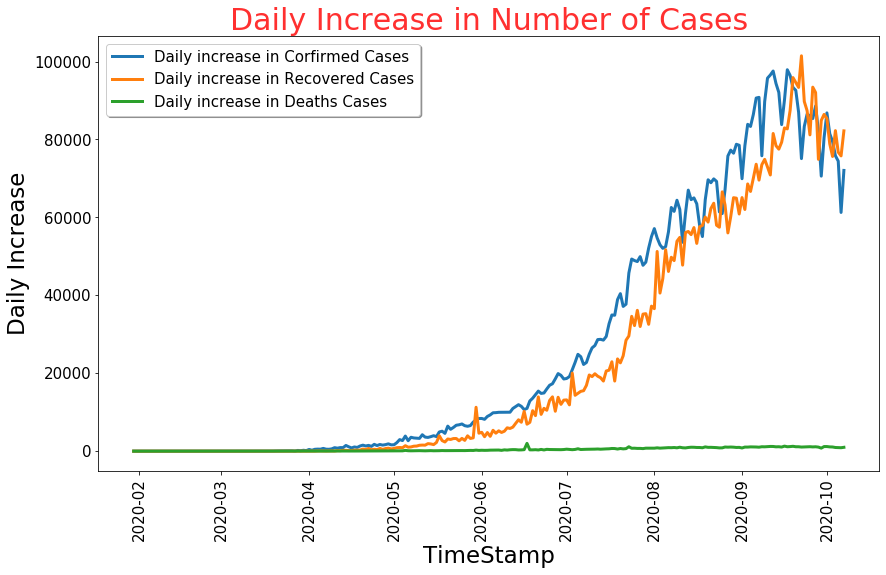

In [17]:
print("Average increase in Number of Confirmed Cases Everyday:" ,np.round(datewise_cases['Confirmed'].diff().fillna(0).mean()))
print("Average increase in Number of Recovered Cases Everyday:" ,np.round(datewise_cases['Cured'].diff().fillna(0).mean()))
print("Average increase in Number of Deaths Cases Everyday:" ,np.round(datewise_cases['Deaths'].diff().fillna(0).mean()))

plt.figure(figsize=(14,8))
plt.plot(datewise_cases['Confirmed'].diff().fillna(0),label= "Daily increase in Corfirmed Cases", linewidth = 3)
plt.plot(datewise_cases['Cured'].diff().fillna(0),label= "Daily increase in Recovered Cases", linewidth = 3)
plt.plot(datewise_cases['Deaths'].diff().fillna(0),label= "Daily increase in Deaths Cases", linewidth = 3)
plt.xlabel("TimeStamp",fontsize = 23)
plt.ylabel("Daily Increase",fontsize = 23)
plt.title("Daily Increase in Number of Cases",fontsize=30,color = "#FF3030")
plt.xticks(rotation=90)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop = {'size' :15},frameon= True,fancybox = True,\
          shadow = True,framealpha = 1)
plt.show()

.

# Step 5 : Performing Linear Regression and SVM (Support Vector Machine) for Predictions and Performing Time-Series Analysis for Future Forecasting

In [18]:
datewise_cases["Day Since"] = datewise_cases.index-datewise_cases.index[0]
datewise_cases["Day Since"] = datewise_cases["Day Since"].dt.days
train_ml = datewise_cases.iloc[:int(datewise_cases.shape[0]*0.55)]
valid_ml = datewise_cases.iloc[:int(datewise_cases.shape[0]*0.55):]
model_score=[]

In [19]:
datewise_cases.tail()

,Confirmed,Deaths,Cured,WeekofYear,Day Since
Date,,,,,
2020-10-03,6473544,100842,5427706,40,247
2020-10-04,6549373,101782,5509966,40,248
2020-10-05,6623815,102685,5586703,41,249
2020-10-06,6685082,103569,5662490,41,250
2020-10-07,6757131,104555,5744693,41,251


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
regression = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)

In [21]:
regression.fit(np.array(train_ml["Day Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Day Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
prediction_linear_valid = regression.predict(np.array(valid_ml["Day Since"]).reshape(-1,1))
prediction_svm_valid = svm.predict(np.array(valid_ml["Day Since"]).reshape(-1,1))

In [23]:
new_date = []
new_prediction_linear = []
new_prediction_svm = []
for i in range(1,85):
    new_date.append(datewise_cases.index[-1] + timedelta(days = i))
    new_prediction_linear.append(regression.predict(np.array(datewise_cases["Day Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise_cases["Day Since"].max()+ i).reshape(-1,1))[0])
    
pd.set_option("display.float_format",lambda x:'%.f'%x) 
model_predictions =pd.DataFrame(zip(new_date,new_prediction_linear,new_prediction_svm),columns=["Date","Confirmed Cases Using LR"," Confirmed Cases Using SVR"])
model_predictions.head(10)


,Date,Confirmed Cases Using LR,Confirmed Cases Using SVR
0,2020-10-08,363831,6892961
1,2020-10-09,365528,7030860
2,2020-10-10,367225,7170957
3,2020-10-11,368922,7313278
4,2020-10-12,370618,7457848
5,2020-10-13,372315,7604696
6,2020-10-14,374012,7753846
7,2020-10-15,375709,7905327
8,2020-10-16,377406,8059166
9,2020-10-17,379102,8215390


- On the above Predictions, we can analysed that LR(Linear Regression) would not predict the consistent Confirmed Cases,because of Linear Regression uses general Regression technique of ordinaly least square and it is one degree equation.Whereas SVM(Support Vector Machine) predict the Consistent Confirmed Cases,because of SVM uses Canonical Method Or Kernal Method and canonical tequnique is going for Polynomial.

- Linear Regression is a regression model, meaning, it’ll take features and predict a continuous output.
- SVM supports both linear and non-linear solutions using kernel trick.
- SVM handles outliers better than LR.
- Both perform well when the training data is less, and there are large number of features.

***Let's Forecasting using Time-Series Analysis***

**A) Forecasting Total Number of Cases using Holt Function**

In [33]:
model_train = datewise_cases.iloc[:int(datewise_cases.shape[0]*0.85)]
valid = datewise_cases.iloc[int(datewise_cases.shape[0]*0.85):]

In [34]:
holt= Holt(np.array(model_train['Confirmed'])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]= holt.forecast(len(valid))

In [35]:
holt_new_date = []
holt_new_prediction= []
for i in range(1,85):
    holt_new_date.append(datewise_cases.index[-1] +timedelta(days = i))
    holt_new_prediction.append(holt.forecast((len(valid)+ i))[-1])
model_predictions["Holts Linear Model Predictions"]= holt_new_prediction
model_predictions.head(45)

,Date,Confirmed Cases Using LR,Confirmed Cases Using SVR,Holts Linear Model Predictions
0,2020-10-08,363831,6892961,6367874
1,2020-10-09,365528,7030860,6440250
2,2020-10-10,367225,7170957,6512626
3,2020-10-11,368922,7313278,6585002
4,2020-10-12,370618,7457848,6657378
5,2020-10-13,372315,7604696,6729754
6,2020-10-14,374012,7753846,6802130
7,2020-10-15,375709,7905327,6874506
8,2020-10-16,377406,8059166,6946882
9,2020-10-17,379102,8215390,7019258


**Awesome!!!**
Here we got approximately exact prediction values for Confirmed COVID-19 Cases in India using Time Series Analysis Algorithm.

**B)  Forecasting Total Number of Cases using Prophet Function**

## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet

In [36]:
from fbprophet import Prophet

**_Forecasting Confirmed COVID-19 Cases around India with Prophet_**

In [37]:

Confirmed_Cases = Covid19_data.groupby('Date').sum()['Confirmed'].reset_index()

In [38]:
Confirmed_Cases.columns = ['ds','y']
Confirmed_Cases['ds'] = pd.to_datetime(Confirmed_Cases['ds'])

In [56]:
Prophet_Forecast = Prophet(interval_width=0.98)
Prophet_Forecast.fit(Confirmed_Cases)
future = Prophet_Forecast.make_future_dataframe(periods=35)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
282,2020-11-07
283,2020-11-08
284,2020-11-09
285,2020-11-10
286,2020-11-11


In [57]:
forecast = Prophet_Forecast.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
277,2020-11-02,8934833,8595543,9195081
278,2020-11-03,9014528,8634112,9295223
279,2020-11-04,9096482,8704648,9415029
280,2020-11-05,9181011,8768181,9486791
281,2020-11-06,9265077,8842352,9576218
282,2020-11-07,9348925,8890865,9705226
283,2020-11-08,9433092,8940901,9785613
284,2020-11-09,9516301,9042849,9886158
285,2020-11-10,9595996,9093553,9959924
286,2020-11-11,9677950,9156942,10101584


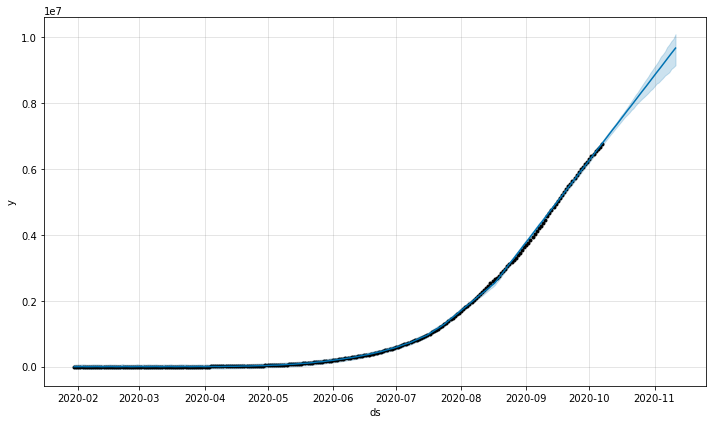

In [58]:
confirmed_forecast_plot = Prophet_Forecast.plot(forecast)

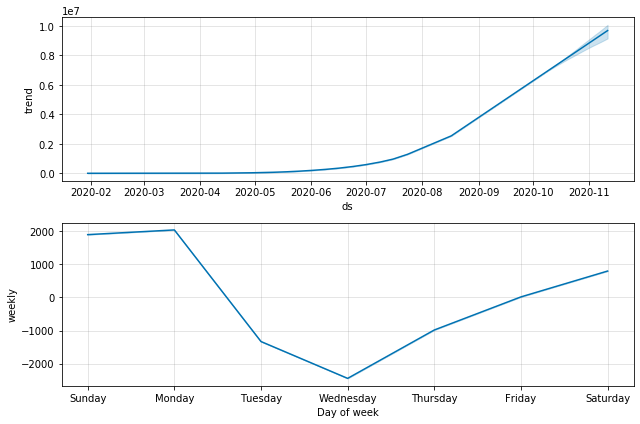

In [59]:
confirmed_forecast_plot =Prophet_Forecast.plot_components(forecast)

.

**_Forecasting Deaths COVID-19 Cases around India with Prophet_**

In [60]:

Deaths_Cases = Covid19_data.groupby('Date').sum()['Deaths'].reset_index()

In [61]:
Deaths_Cases.columns = ['ds','y']
Deaths_Cases['ds'] = pd.to_datetime(Deaths_Cases['ds'])

In [62]:
Prophet_Forecast = Prophet(interval_width=0.98)
Prophet_Forecast.fit(Deaths_Cases)
future = Prophet_Forecast.make_future_dataframe(periods=35)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
282,2020-11-07
283,2020-11-08
284,2020-11-09
285,2020-11-10
286,2020-11-11


In [63]:
forecast = Prophet_Forecast.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
277,2020-11-02,132586,127702,136617
278,2020-11-03,133613,128659,138280
279,2020-11-04,134737,129653,139196
280,2020-11-05,135831,130109,140578
281,2020-11-06,136910,130778,142044
282,2020-11-07,137988,131981,143274
283,2020-11-08,139044,132677,144622
284,2020-11-09,140094,133630,145999
285,2020-11-10,141122,134260,147287
286,2020-11-11,142246,135062,148423


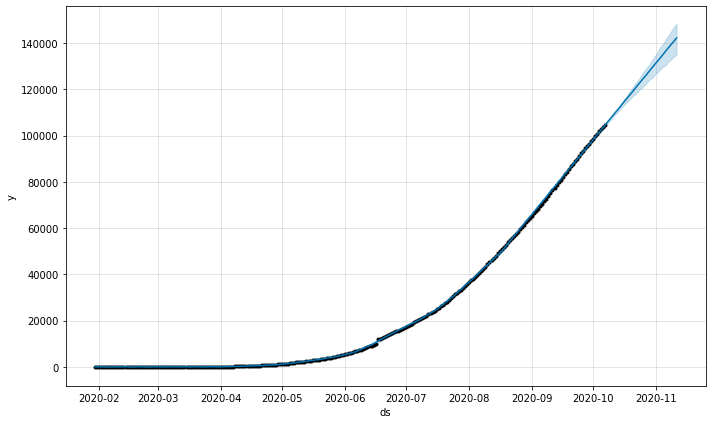

In [64]:
deaths_forecast_plot = Prophet_Forecast.plot(forecast)

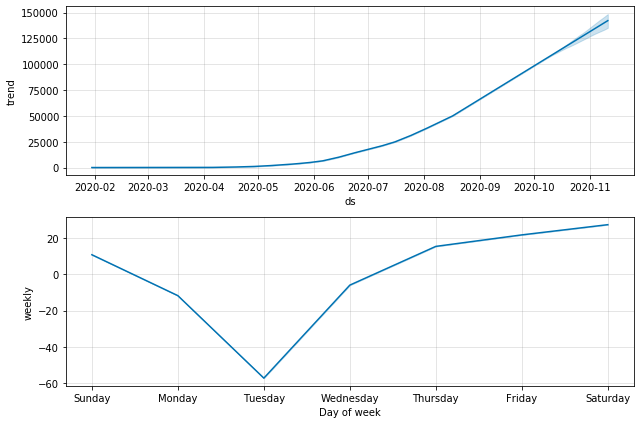

In [65]:
deaths_forecast_plot = Prophet_Forecast.plot_components(forecast)

.

**_Forecasting Recovered COVID-19 Cases around India with Prophet_**

In [66]:

Cured_Cases = Covid19_data.groupby('Date').sum()['Cured'].reset_index()

In [67]:
Cured_Cases.columns = ['ds','y']
Cured_Cases['ds'] = pd.to_datetime(Cured_Cases['ds'])

In [68]:
Prophet_Forecast = Prophet(interval_width=0.98)
Prophet_Forecast.fit(Cured_Cases)
future = Prophet_Forecast.make_future_dataframe(periods=35)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
282,2020-11-07
283,2020-11-08
284,2020-11-09
285,2020-11-10
286,2020-11-11


In [71]:
forecast = Prophet_Forecast.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
277,2020-11-02,7590744,7332682,7902934
278,2020-11-03,7666229,7386982,7996716
279,2020-11-04,7742202,7456309,8091754
280,2020-11-05,7814318,7497989,8180680
281,2020-11-06,7890074,7540309,8241312
282,2020-11-07,7966334,7635595,8346056
283,2020-11-08,8043218,7679632,8455032
284,2020-11-09,8118537,7738152,8525131
285,2020-11-10,8194022,7786183,8649667
286,2020-11-11,8269995,7839472,8721300


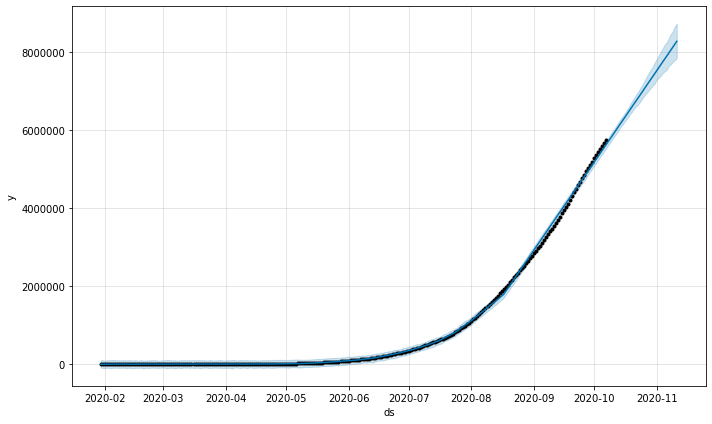

In [72]:
recovered_forecast_plot = Prophet_Forecast.plot(forecast)

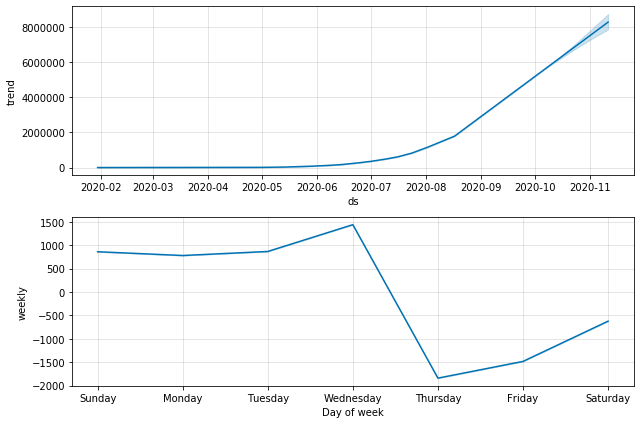

In [73]:
recovered_forecast_plot = Prophet_Forecast.plot_components(forecast)


.

# Step 6 :Performing State~Wise Analysis

In [74]:

covid19_data_latest =Covid19_data[Covid19_data['Date']=="10/07/20"]
covid19_data_latest.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7081,7082,2020-10-07,8:00 AM,Telengana,-,-,177008,1189,204748
7082,7083,2020-10-07,8:00 AM,Tripura,-,-,22623,301,27545
7083,7084,2020-10-07,8:00 AM,Uttarakhand,-,-,43238,677,52329
7084,7085,2020-10-07,8:00 AM,Uttar Pradesh,-,-,370753,6153,420937
7085,7086,2020-10-07,8:00 AM,West Bengal,-,-,243743,5318,277049


In [75]:
covid19_data_latest['Confirmed'].sum()

6757131

So now we have filtered the dataset of 7086 records on the basis of the most recent data for every state. On inspecting this data, we see that India has a total of 6757131 Confirmed cases till 07th October 2020.

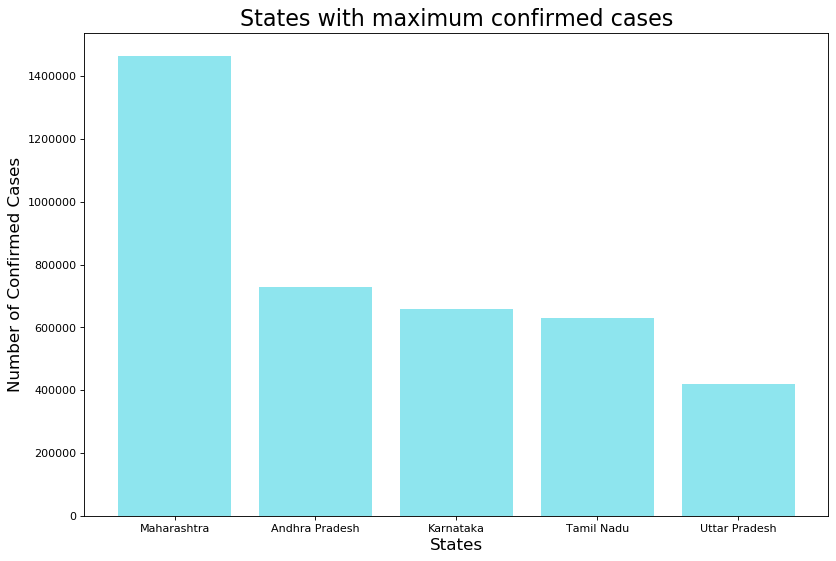

In [76]:
covid19_data_latest = covid19_data_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_data_latest['State/UnionTerritory'][:5], covid19_data_latest['Confirmed'][:5],
        align='center',color='#8EE5EE')
plt.xlabel('States', size = 15)
plt.ylabel('Number of Confirmed Cases', size = 15)
plt.title('States with maximum confirmed cases', size = 20)
plt.show()

On inspecting the above visualization, we see that Maharashtra has the most number of inspected cases as of now. Maharashtra is almost crossed 14,50,000 cases and may well have crossed that figure by the time. The situation in Maharashtra is so grave that no other state in India has crossed even half that mark as per the data we have. Andhra Pradesh and Karnataka are about to above the 6,50,000 mark whereas  Tamil Nadu have just over 6,30,000 cases and Uttar Pradesh is almost touching 4,50,000 cases.

In [77]:
covid19_data_latest['Deaths'].sum()

104555

 **As per the data in the dataset, India has had 51797 deaths across all states. We will now see which states have the most deaths.**

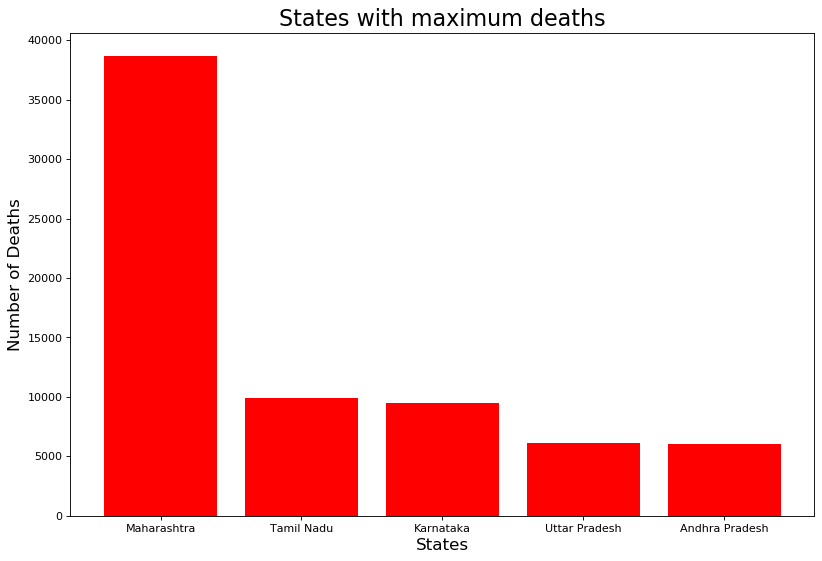

In [78]:
covid19_data_latest = covid19_data_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_data_latest['State/UnionTerritory'][:5], covid19_data_latest['Deaths'][:5], align='center',color='red')
plt.xlabel('States', size = 15)
plt.ylabel('Number of Deaths', size = 15)
plt.title('States with maximum deaths', size = 20)
plt.show()

From above graph we can analyzed that **Maharashtra** currently account for almost half of the deaths in India due to COVID-19.Maharashtra having above 37,000 death cases. Second placed **Tamil Nadu and Karnatka** has not reached the halfway mark here as well.Tamil Nadu and Karnatka having almost 10,000 death cases. **Uttar Pradesh and Andhra Pradesh** is having almost 6,000 death cases in India.

**Next up**,We will look at the number of deaths per confirmed cases in different Indian states to gain a better idea about the healthcare facilities available.

In [79]:
covid19_data_latest['Deaths/Confirmed Cases'] = (covid19_data_latest['Confirmed']/covid19_data_latest['Deaths']).round(2)
covid19_data_latest['Deaths/Confirmed Cases'] = [np.nan if x == float("inf") else x for x in covid19_data_latest['Deaths/Confirmed Cases']]
covid19_data_latest = covid19_data_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True, na_position='last')
covid19_data_latest.iloc[:20]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
7077,7078,2020-10-07,8:00 AM,Punjab,-,-,104355,3679,120016,33
7070,7071,2020-10-07,8:00 AM,Maharashtra,-,-,1179726,38717,1465911,38
7061,7062,2020-10-07,8:00 AM,Gujarat,-,-,125111,3519,145200,41
7085,7086,2020-10-07,8:00 AM,West Bengal,-,-,243743,5318,277049,52
7059,7060,2020-10-07,8:00 AM,Delhi,-,-,266935,5581,295236,53
7076,7077,2020-10-07,8:00 AM,Puducherry,-,-,24614,546,29682,54
7069,7070,2020-10-07,8:00 AM,Madhya Pradesh,-,-,118039,2488,138668,56
7064,7065,2020-10-07,8:00 AM,Jammu and Kashmir,-,-,65496,1268,80476,63
7080,7081,2020-10-07,8:00 AM,Tamil Nadu,-,-,575212,9917,630408,64
7079,7080,2020-10-07,8:00 AM,Sikkim,-,-,2587,49,3216,66


On inspecting the above visualization, we see that there are some states like Gujarat, Maharashtra and Punjab where the number of cases and deaths are pretty low as of now and it appears things are in control.But other states like Ladakh, Haryana,Tripura look well hit by the condition.

.

In [80]:
covid19_df_latest = covid19_data_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid19_df_latest.shape
covid19_df_latest.head(10)


,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
7077,Punjab,104355,3679,120016,33
7070,Maharashtra,1179726,38717,1465911,38
7061,Gujarat,125111,3519,145200,41
7085,West Bengal,243743,5318,277049,52
7059,Delhi,266935,5581,295236,53
7076,Puducherry,24614,546,29682,54
7069,Madhya Pradesh,118039,2488,138668,56
7064,Jammu and Kashmir,65496,1268,80476,63
7080,Tamil Nadu,575212,9917,630408,64
7079,Sikkim,2587,49,3216,66


.

# Step 7 : Analysing Cases Per 10 Million

In [81]:
indian_states_data = indian_states_data[['State', 'Aadhaar assigned as of 2019']]
indian_states_data.columns = ['State/UnionTerritory', 'Population']
indian_states_data.head(10)

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185
5,Goa,1587012
6,Telengana,39184011
7,Uttarakhand,11082791
8,Chandigarh,1131522
9,Lakshadweep,70374


We will now merge the Population dataset with our main dataset and create a new feature called Cases/10 Million to gain some more idea on really which cases are more hit by the COVID-19 crisis. 

In [82]:
covid19_df_latest = pd.merge(covid19_df_latest, indian_states_data, on="State/UnionTerritory")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest.head()
covid19_df_latest.style.background_gradient(cmap='Reds')


,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
0,Punjab,104355,3679,120016,32.620000,30355185,39537.232272
1,Maharashtra,1179726,38717,1465911,37.860000,114063427,128517.180183
2,Gujarat,125111,3519,145200,41.260000,62097024,23382.763077
3,West Bengal,243743,5318,277049,52.100000,91928327,30137.500490
4,Delhi,266935,5581,295236,52.900000,21763471,135656.669839
5,Puducherry,24614,546,29682,54.360000,1286189,230774.792818
6,Madhya Pradesh,118039,2488,138668,55.730000,74770270,18545.873915
7,Tamil Nadu,575212,9917,630408,63.570000,72344821,87139.340631
8,Sikkim,2587,49,3216,65.630000,578914,55552.292741
9,Uttar Pradesh,370753,6153,420937,68.410000,203757489,20658.725334


In [83]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million', ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
26,Assam,155077,778,188902,243,6755448,279629
5,Puducherry,24614,546,29682,54,1286189,230775
15,Goa,31050,468,36238,77,1587012,228341
14,Ladakh,3464,61,4720,77,210156,224595
22,Andhra Pradesh,672479,6052,729307,121,49145456,148398
4,Delhi,266935,5581,295236,53,21763471,135657
1,Maharashtra,1179726,38717,1465911,38,114063427,128517
11,Chandigarh,11035,180,12707,71,1131522,112300
10,Karnataka,533074,9461,657705,70,62462743,105296
30,Arunachal Pradesh,7965,20,11007,550,1229964,89490


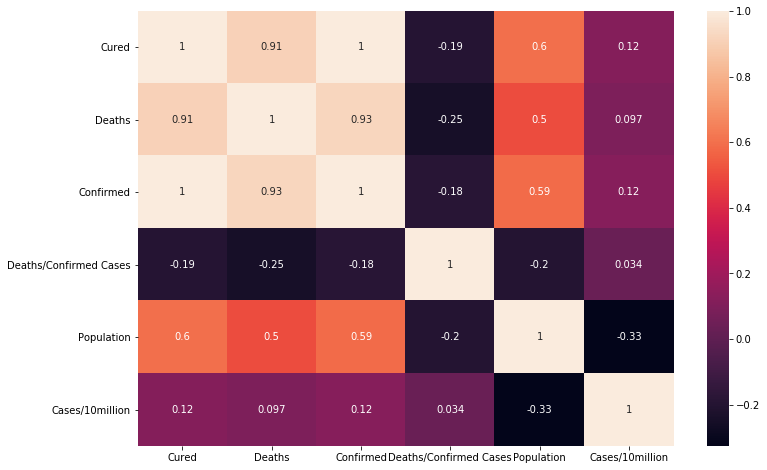

In [84]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)

*We notice that some measures like Confirmed, Cured, Deaths and Cases/10 million are very much co-related and we do not fret to realise the reason.*

.

# Step 8 : Analysis over Individual Data

In [85]:
Individuals_data.isnull().sum()
Individuals_data.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
current_status                   Recovered
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

**The first case in India due to COVID-19 was noticed on 30th January 2020. It was detected in the city of Thrissur in Kerala. The individual had a travel history in Wuhan.**

- Next up, I decided to group the individual data in terms of district where the case was found.

In [86]:
individuals_grouped_district = Individuals_data.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns = ['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       3149
Ahmedabad    2181
Indore       1176
Jaipur        808
Pune          706
Name: id, dtype: int64

**From the data which was available, Mumbai is the worst hit district in the country.Pune is another district in Maharashtra which figures in this list. All these districts belong to states which we had seen in the earlier graphs as well.**

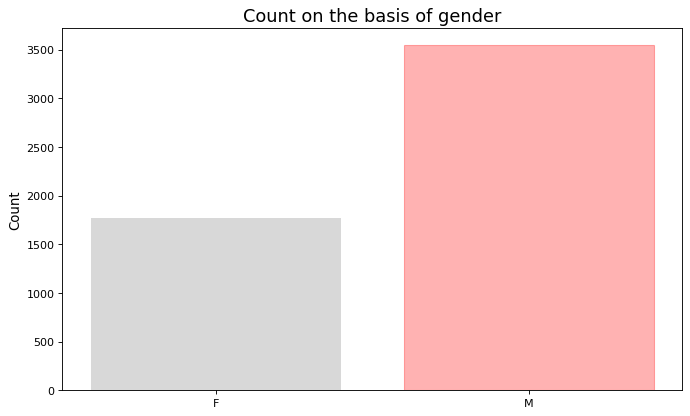

In [87]:
individuals_grouped_gender = Individuals_data.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()
plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(individuals_grouped_gender['gender'], individuals_grouped_gender['count'], align = 'center', color='grey', alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

- Continuing our analysis, I thought about looking at how the case count is distributed according to gender. We see that there is no parity in this distribution. From above graph, it seems that the virus is affecting males more than females in India.

.

# Step 9 : Analysing the progression of case count in India

In [88]:
individuals_grouped_date = Individuals_data.groupby('diagnosed_date')
individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name = "count"))
individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply( 
   lambda x: pd.Series(str(x).split("/")))
individuals_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [89]:
individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
54,22/04/2020,1302,21503
55,23/04/2020,1701,23204
56,24/04/2020,1444,24648
57,25/04/2020,1883,26531
58,26/04/2020,1651,28182


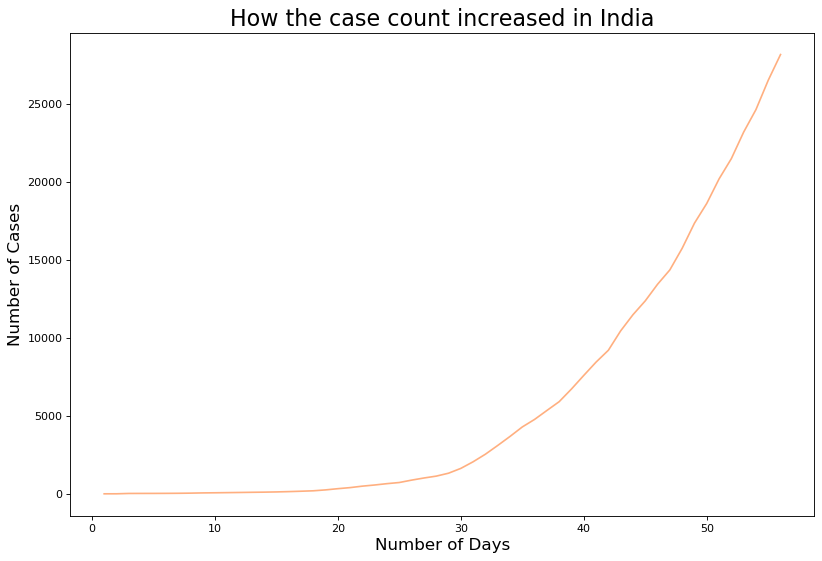

In [90]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
individuals_grouped_date['Day Number'] = individuals_grouped_date['Day Number'] - 2
individuals_grouped_date
plt.figure(figsize=(12,8), dpi=80)
plt.plot(individuals_grouped_date['Day Number'], individuals_grouped_date['Cumulative Count'], color="#FF6103", alpha = 0.5)
plt.xlabel('Number of Days', size = 15)
plt.ylabel('Number of Cases', size = 15)
plt.title('How the case count increased in India', size=20)
plt.show()

**In the above curve, we see that the rise was more or less steady till the 20th day mark. In the interval between 20–30, the curve inclined a little. This inclination gradually incremented and we see a steady and steep slope after 30-day mark with no signs of flattening. These are ominous indications.**

In the next few code elements, I prepare and process the dataset to group the data in terms of different states. I used the following five states for this next analysis:
- Maharashtra
- Kerala
- Delhi
- Rajasthan
- Gujarat

In [91]:
covid19_maharashtra = Covid19_data[Covid19_data['State/UnionTerritory'] == "Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra = covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Maharashtra"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values, ignore_index = True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)
covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(220, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


In [92]:
covid19_maharashtra.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
215,216,2020-10-03 00:00:00,Maharashtra,37480,1416513
216,217,2020-10-04 00:00:00,Maharashtra,37758,1430861
217,218,2020-10-05 00:00:00,Maharashtra,38084,1443409
218,219,2020-10-06 00:00:00,Maharashtra,38347,1453653
219,220,2020-10-07 00:00:00,Maharashtra,38717,1465911


In [93]:
covid19_kerala = Covid19_data[Covid19_data['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(220, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,2020-03-02,Kerala,0,3
1,2,2020-03-03,Kerala,0,3
2,3,2020-03-04,Kerala,0,3
3,4,2020-03-05,Kerala,0,3
4,5,2020-03-06,Kerala,0,3


In [94]:
covid19_kerala.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
215,216,2020-10-03,Kerala,791,213499
216,217,2020-10-04,Kerala,813,221333
217,218,2020-10-05,Kerala,836,229886
218,219,2020-10-06,Kerala,859,234928
219,220,2020-10-07,Kerala,884,242799


In [95]:
covid19_delhi = Covid19_data[Covid19_data['State/UnionTerritory'] == 'Delhi']
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(220, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,2020-03-02,Delhi,0,1
1,2,2020-03-03,Delhi,0,1
2,3,2020-03-04,Delhi,0,1
3,4,2020-03-05,Delhi,0,2
4,5,2020-03-06,Delhi,0,3


In [96]:
covid19_delhi.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
215,216,2020-10-03,Delhi,5438,285672
216,217,2020-10-04,Delhi,5472,287930
217,218,2020-10-05,Delhi,5510,290613
218,219,2020-10-06,Delhi,5542,292560
219,220,2020-10-07,Delhi,5581,295236


In [97]:
covid19_rajasthan = Covid19_data[Covid19_data['State/UnionTerritory'] == "Rajasthan"]
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan = covid19_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_rajasthan['Day Count'] = covid19_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
covid19_rajasthan = covid19_rajasthan.append(missing_values, ignore_index = True)
covid19_rajasthan = covid19_rajasthan.sort_values(by="Day Count", ascending = True)
covid19_rajasthan.reset_index(drop=True, inplace=True)
print(covid19_rajasthan.shape)
covid19_rajasthan.head()

(220, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,2020-03-03 00:00:00,Rajasthan,0,1
2,3,2020-03-04 00:00:00,Rajasthan,0,15
3,4,2020-03-05 00:00:00,Rajasthan,0,15
4,5,2020-03-06 00:00:00,Rajasthan,0,15


In [98]:
covid19_rajasthan.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
215,216,2020-10-03 00:00:00,Rajasthan,1516,139696
216,217,2020-10-04 00:00:00,Rajasthan,1530,141846
217,218,2020-10-05 00:00:00,Rajasthan,1545,144030
218,219,2020-10-06 00:00:00,Rajasthan,1559,146195
219,220,2020-10-07 00:00:00,Rajasthan,1574,148316


In [99]:
covid19_gujarat = Covid19_data[Covid19_data['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(220, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


In [100]:
covid19_gujarat.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
215,216,2020-10-03 00:00:00,Gujarat,3475,139893
216,217,2020-10-04 00:00:00,Gujarat,3487,141236
217,218,2020-10-05 00:00:00,Gujarat,3496,142538
218,219,2020-10-06 00:00:00,Gujarat,3509,143865
219,220,2020-10-07 00:00:00,Gujarat,3519,145200


- All of the five states have 170 records with 5 features. Each record stands for every day.


**Let us now have a look at the Visualization.**

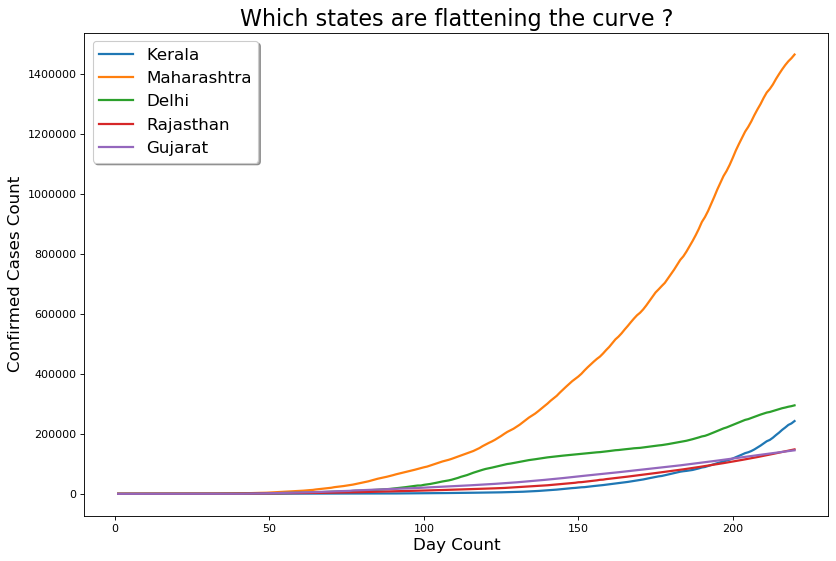

In [101]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'],linewidth=2)
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'],linewidth=2)
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'],linewidth=2)
plt.plot(covid19_rajasthan['Day Count'], covid19_rajasthan['Confirmed'],linewidth=2)
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'],linewidth=2)
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat'], loc='upper left',prop = {'size' : 15},frameon= True,fancybox = True,\
          shadow = True,framealpha = 1)
plt.xlabel('Day Count', size=15)
plt.ylabel('Confirmed Cases Count', size=15)
plt.title('Which states are flattening the curve ?', size = 20)
plt.show()

We see almost all the curves follow the curve which is displayed by the nation as a whole. The only anomaly is that of Kerala. Kerala’s curve saw the gradual incline in the period between 20–115 days as seen in other curves. But what Kerala managed to do was it did not let the curve incline further and manage to flatten the curve. As a result, the state has been able to contain the situation.

The situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. Delhi’s curve steeped at a later time interval compared to the rest. It remained in control till the 30-day mark and the steep worsened after 40 days.

# Conclusion:
The only way we can as a whole prevent this impending crisis is by flattening the curve. All state governments need to follow the Kerala model. It is the only state which managed to flatten the curve and hence, must have done most things right. It’s time we followed the Kerala model.

$$**Thankyou!!!**$$

# @Majeed Shaikh
(Desk Research)